In [3]:
from sklearn import datasets
import seaborn as sns

In [6]:
iris = sns.load_dataset('iris')

In [7]:
type(iris)

pandas.core.frame.DataFrame

In [8]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [9]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

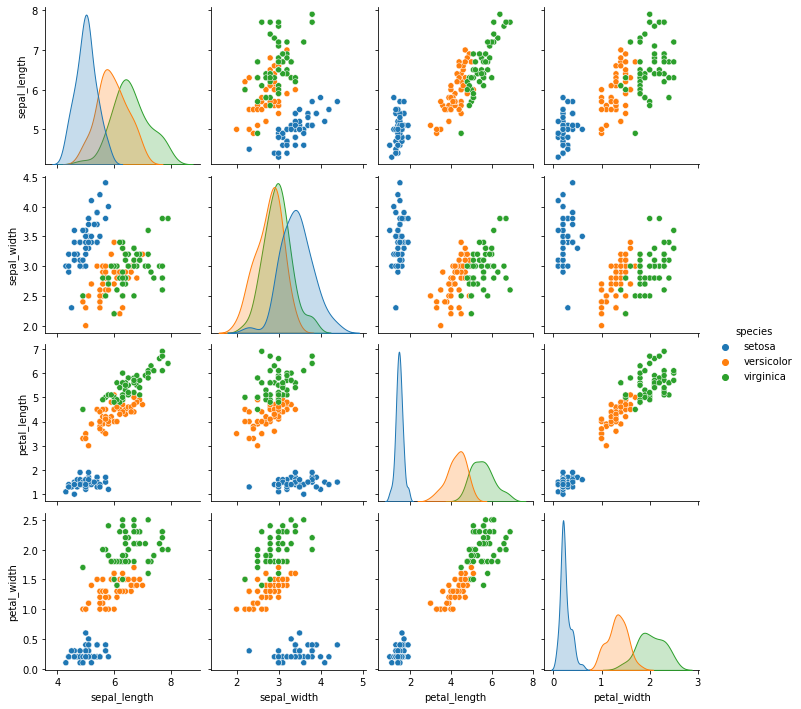

In [15]:
sns.pairplot(data=iris, hue="species")

In [17]:
iris_simple = iris.drop(["sepal_length","sepal_width"],axis=1)
iris_simple.head()

petal_length  petal_width species
0           1.4          0.2  setosa
1           1.4          0.2  setosa
2           1.3          0.2  setosa
3           1.5          0.2  setosa
4           1.4          0.2  setosa

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
iris_simple["species"] = encoder.fit_transform(iris_simple["species"])

In [19]:
iris_simple

petal_length  petal_width  species
0             1.4          0.2        0
1             1.4          0.2        0
2             1.3          0.2        0
3             1.5          0.2        0
4             1.4          0.2        0
..            ...          ...      ...
145           5.2          2.3        2
146           5.0          1.9        2
147           5.2          2.0        2
148           5.4          2.3        2
149           5.1          1.8        2

[150 rows x 3 columns]

In [21]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [24]:
trans = StandardScaler()
_iris_simple = trans.fit_transform(iris_simple[["petal_length","petal_width"]])
_iris_simple = pd.DataFrame(_iris_simple, columns = ["petal_length","petal_width"])
_iris_simple.describe()

petal_length   petal_width
count  1.500000e+02  1.500000e+02
mean  -8.652338e-16 -4.662937e-16
std    1.003350e+00  1.003350e+00
min   -1.567576e+00 -1.447076e+00
25%   -1.226552e+00 -1.183812e+00
50%    3.364776e-01  1.325097e-01
75%    7.627583e-01  7.906707e-01
max    1.785832e+00  1.712096e+00

In [25]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(iris_simple,test_size=0.2)

In [26]:
test_set.head()

petal_length  petal_width  species
106           4.5          1.7        2
90            4.4          1.2        1
91            4.6          1.4        1
80            3.8          1.1        1
5             1.7          0.4        0

In [28]:
iris_x_train = train_set[["petal_length","petal_width"]]
iris_x_train.head()

petal_length  petal_width
143           5.9          2.3
45            1.4          0.3
122           6.7          2.0
60            3.5          1.0
88            4.1          1.3

In [29]:
iris_y_train = train_set["species"].copy()
iris_y_train.head()

143    2
45     0
122    2
60     1
88     1
Name: species, dtype: int64

In [30]:
iris_x_test = test_set[["petal_length","petal_width"]]
iris_x_test.head()

petal_length  petal_width
106           4.5          1.7
90            4.4          1.2
91            4.6          1.4
80            3.8          1.1
5             1.7          0.4

In [31]:
iris_y_test = test_set["species"].copy()
iris_y_test.head()

106    2
90     1
91     1
80     1
5      0
Name: species, dtype: int64

# k-NN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
clf = KNeighborsClassifier()
clf

KNeighborsClassifier()

In [50]:
clf.fit(iris_x_train,iris_y_train)

KNeighborsClassifier()

In [53]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 1 1 1 0 2 1 1 1 1 0 2 2 1 0 2 2 0 2 1 2 1 2 1 1 2 0 1 2 0]
[2 1 1 1 0 2 1 1 1 1 0 2 2 1 0 2 2 0 2 1 2 1 2 1 1 2 0 1 2 0]


In [55]:
encoder.inverse_transform(res)

array(['versicolor', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa'], dtype=object)

In [58]:
accuracy = clf.score(iris_x_test,iris_y_test)
print("准确率:{:.1%}".format(accuracy))

准确率:96.7%


In [59]:
out = iris_x_test.copy()
out["y"] = iris_y_test
out["pre"] = res
out

petal_length  petal_width  y  pre
106           4.5          1.7  2    1
90            4.4          1.2  1    1
91            4.6          1.4  1    1
80            3.8          1.1  1    1
5             1.7          0.4  0    0
132           5.6          2.2  2    2
89            4.0          1.3  1    1
52            4.9          1.5  1    1
56            4.7          1.6  1    1
93            3.3          1.0  1    1
41            1.3          0.3  0    0
100           6.0          2.5  2    2
126           4.8          1.8  2    2
54            4.6          1.5  1    1
33            1.4          0.2  0    0
145           5.2          2.3  2    2
144           5.7          2.5  2    2
19            1.5          0.3  0    0
103           5.6          1.8  2    2
68            4.5          1.5  1    1
147           5.2          2.0  2    2
74            4.3          1.3  1    1
149           5.1          1.8  2    2
79            3.5          1.0  1    1
99            4.1          1.3  1    1
108           5.8          1.8  2    2
39            1.5          0.2  0    0
84            4.5          1.5  1    1
113           5.0          2.0  2    2
47            1.4          0.2  0    0

In [60]:
out.to_csv("iris_predict.csv")

# 可视化

In [63]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def draw(clf):

    # 网格化
    M, N = 500, 500
    x1_min, x2_min = iris_simple[["petal_length", "petal_width"]].min(axis=0)
    x1_max, x2_max = iris_simple[["petal_length", "petal_width"]].max(axis=0)
    t1 = np.linspace(x1_min, x1_max, M)
    t2 = np.linspace(x2_min, x2_max, N)
    x1, x2 = np.meshgrid(t1, t2)
    
    # 预测
    x_show = np.stack((x1.flat, x2.flat), axis=1)
    y_predict = clf.predict(x_show)
    
    # 配色
    cm_light = mpl.colors.ListedColormap(["#A0FFA0", "#FFA0A0", "#A0A0FF"])
    cm_dark = mpl.colors.ListedColormap(["g", "r", "b"])
    
    # 绘制预测区域图
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap=cm_light)
    
    # 绘制原始数据点
    plt.scatter(iris_simple["petal_length"], iris_simple["petal_width"], label=None,
                c=iris_simple["species"], cmap=cm_dark, marker='o', edgecolors='k')
    plt.xlabel("petal_length")
    plt.ylabel("petal_width")
    
    # 绘制图例
    color = ["g", "r", "b"]
    species = ["setosa", "virginica", "versicolor"]
    for i in range(3):
        plt.scatter([], [], c=color[i], s=40, label=species[i])    # 利用空点绘制图例
    plt.legend(loc="best")
    plt.title('iris_classfier')

/var/folders/_z/0lgplp010n1_fv7v4yw1m6nm0000gq/T/ipykernel_17573/2574466903.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap=cm_light)


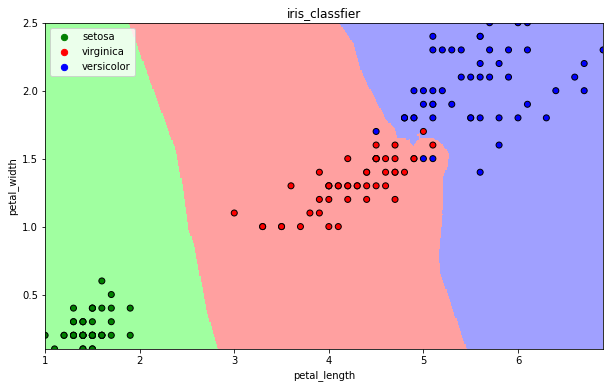

In [64]:
draw(clf)